In [1]:
from pathlib import Path
from book_loader import BookLoader
from typing import Dict, List
import pandas as pd
import matplotlib.pyplot as plt
import re

import spacy
from spacy.lang.fr.stop_words import STOP_WORDS as fr_stop
# spacy.prefer_gpu() # NB doesn't have access to GPU through WSL

In [2]:
data_path = Path("data/D5627-Dolan.docx").expanduser().resolve()
book = BookLoader(data_path=data_path)
chapters: list[list[str]] = book.chapters

/home/ahmedm/anaconda3/envs/LDS/lib/python3.10/site-packages/simplify_docx/iterators/generic.py:193: UnexpectedElementWarning: Skipping unexpected tag: {http://schemas.openxmlformats.org/wordprocessingml/2006/main}pict
  warn("Skipping unexpected tag: %s" % (current.tag),


In [3]:
print(f"chapters[1][:3]: {chapters[1][:3]}\n")
print(f"chapters[1][-6]: {type(chapters[1][-6])}")

chapters[1][:3]: ['Chapitre 1 /', "Stress, santé et travail: vue d'ensemble", "J'oublie ce que j'entends, je me rappelle ce que je vois, je comprends ce que je fais."]

chapters[1][-6]: <class 'str'>


In [4]:
chapters_without_tables = [
    list(filter(lambda p: isinstance(p, str), chap))
    for chap in chapters]

In [5]:
chapters_without_tables[1][-6]

'/\tPost-scriptum'

In [6]:
df = pd.DataFrame(data={"chapters": range(len(chapters_without_tables))})

def count_words(i):
    return sum(map(lambda p: len(p.split()), chapters_without_tables[i]))

df["words"] = df["chapters"].apply(count_words)
                      

def count_unique_words(i):
    return len(set('\n'.join(chapters_without_tables[i]).split()))

df["unique_words"] = df["chapters"].apply(count_unique_words)


def count_stop_words(p):
    return sum(1 for w in p.split() if w in fr_stop)

df["stop_words"] = df["chapters"].apply(
    lambda i: sum(map(count_stop_words, chapters_without_tables[i])))


def count_bisections(p):
    return len(bisection_pat.findall(p))

bisection_pat = re.compile(r"([A-Za-z]+)-\s([A-Za-z]+)")
df["bisected_words"] = df["chapters"].apply(
    lambda i: sum(map(count_bisections, chapters_without_tables[i])))


df.style.hide(axis='index')

chapters,words,unique_words,stop_words,bisected_words
0,4717,1836,2109,77
1,8050,2748,3419,110
2,11356,3627,4684,139
3,11564,3741,4916,164
4,14892,4807,6518,156
5,15178,4462,6608,195
6,1754,822,796,0


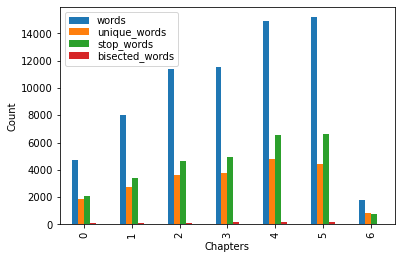

In [7]:
bar_plot = df.iloc[:, 1:].plot.bar(xlabel="Chapters", ylabel="Count")
plt.legend(loc='best', labelspacing=0.1)
fig = plt.gcf()

In [8]:
fig.savefig("stats.jpg")